# Projet fouille de données AWA_DIOP

# Données:



# Contexte de l’étude et problématique

# Contexte

# problématique

# Description des données

# Etape du prétraitement des données

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [27]:
#Importation et pré-traitement
data = pd.read_csv("C:/Users/eva/Downloads/archive (5)/housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [8]:
data['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
data = data[data['ocean_proximity'] != 'ISLAND']


In [10]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
# Imputation par la moyenne
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,419.306772,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,297.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,644.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


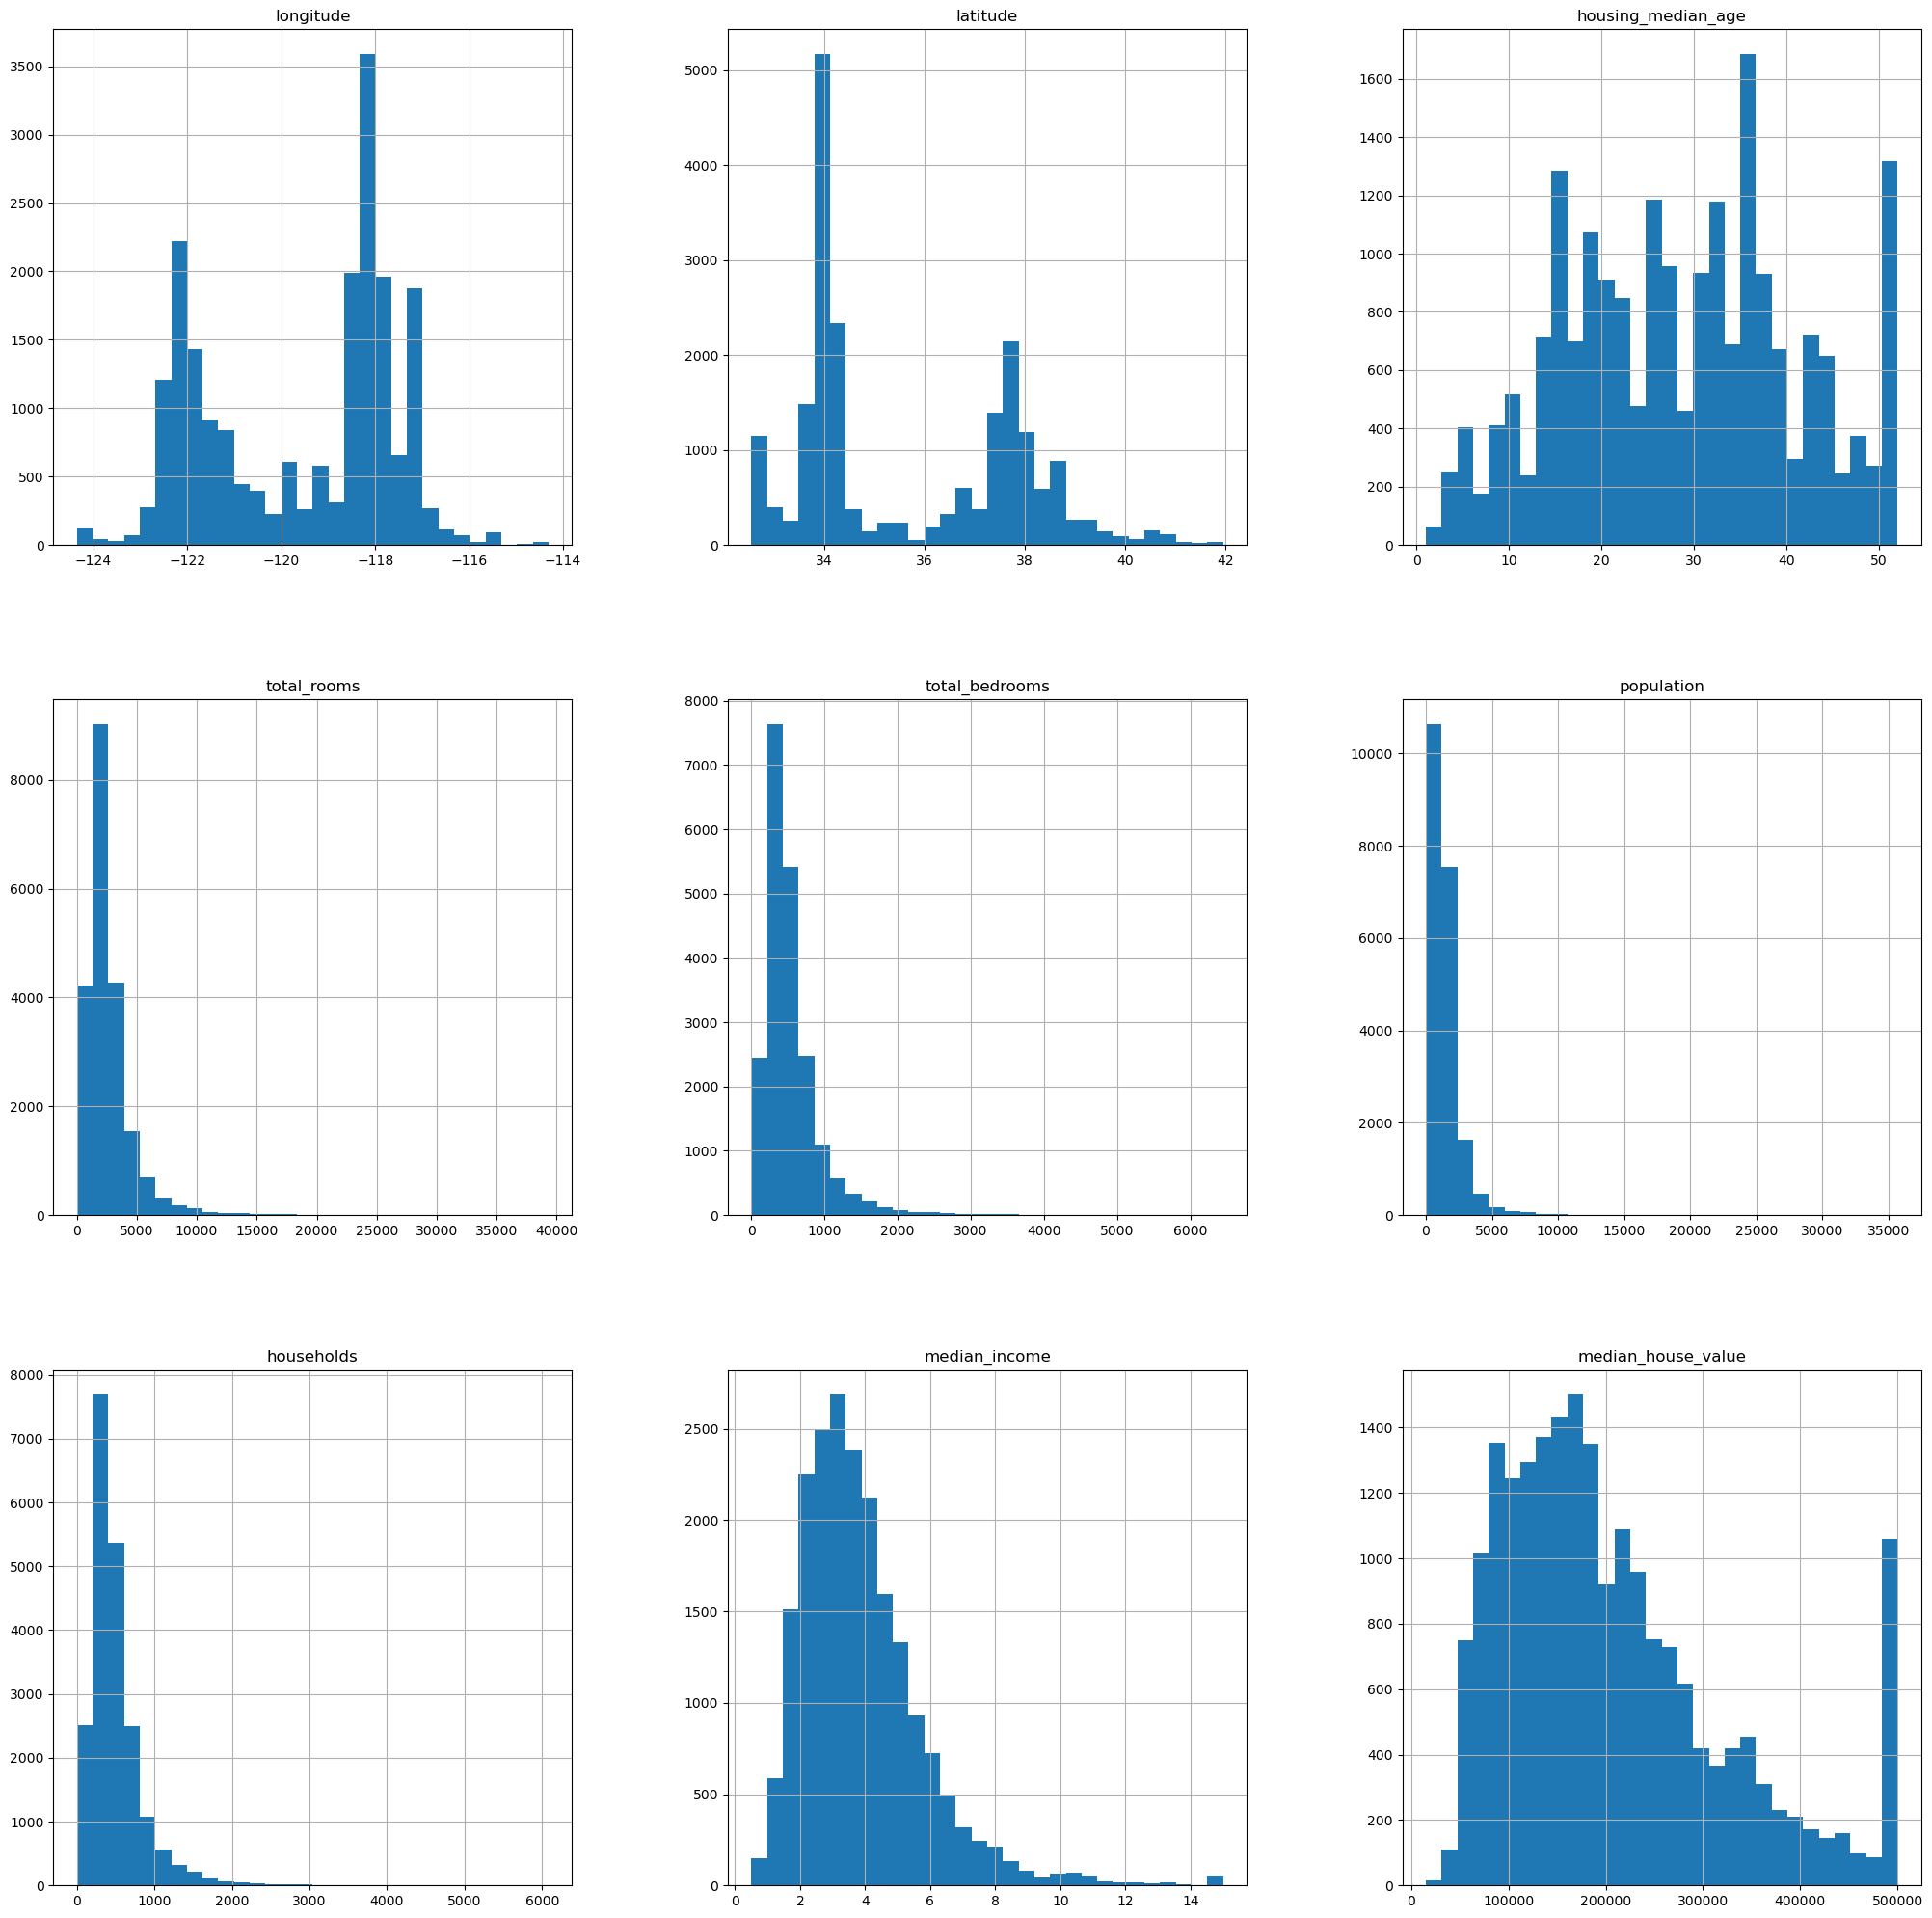

In [13]:
data.hist(figsize=(25,25),bins=30);


In [14]:
le = LabelEncoder()
data["ocean_proximity"] = le.fit_transform(data["ocean_proximity"])


In [15]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Figure size 640x480 with 0 Axes>

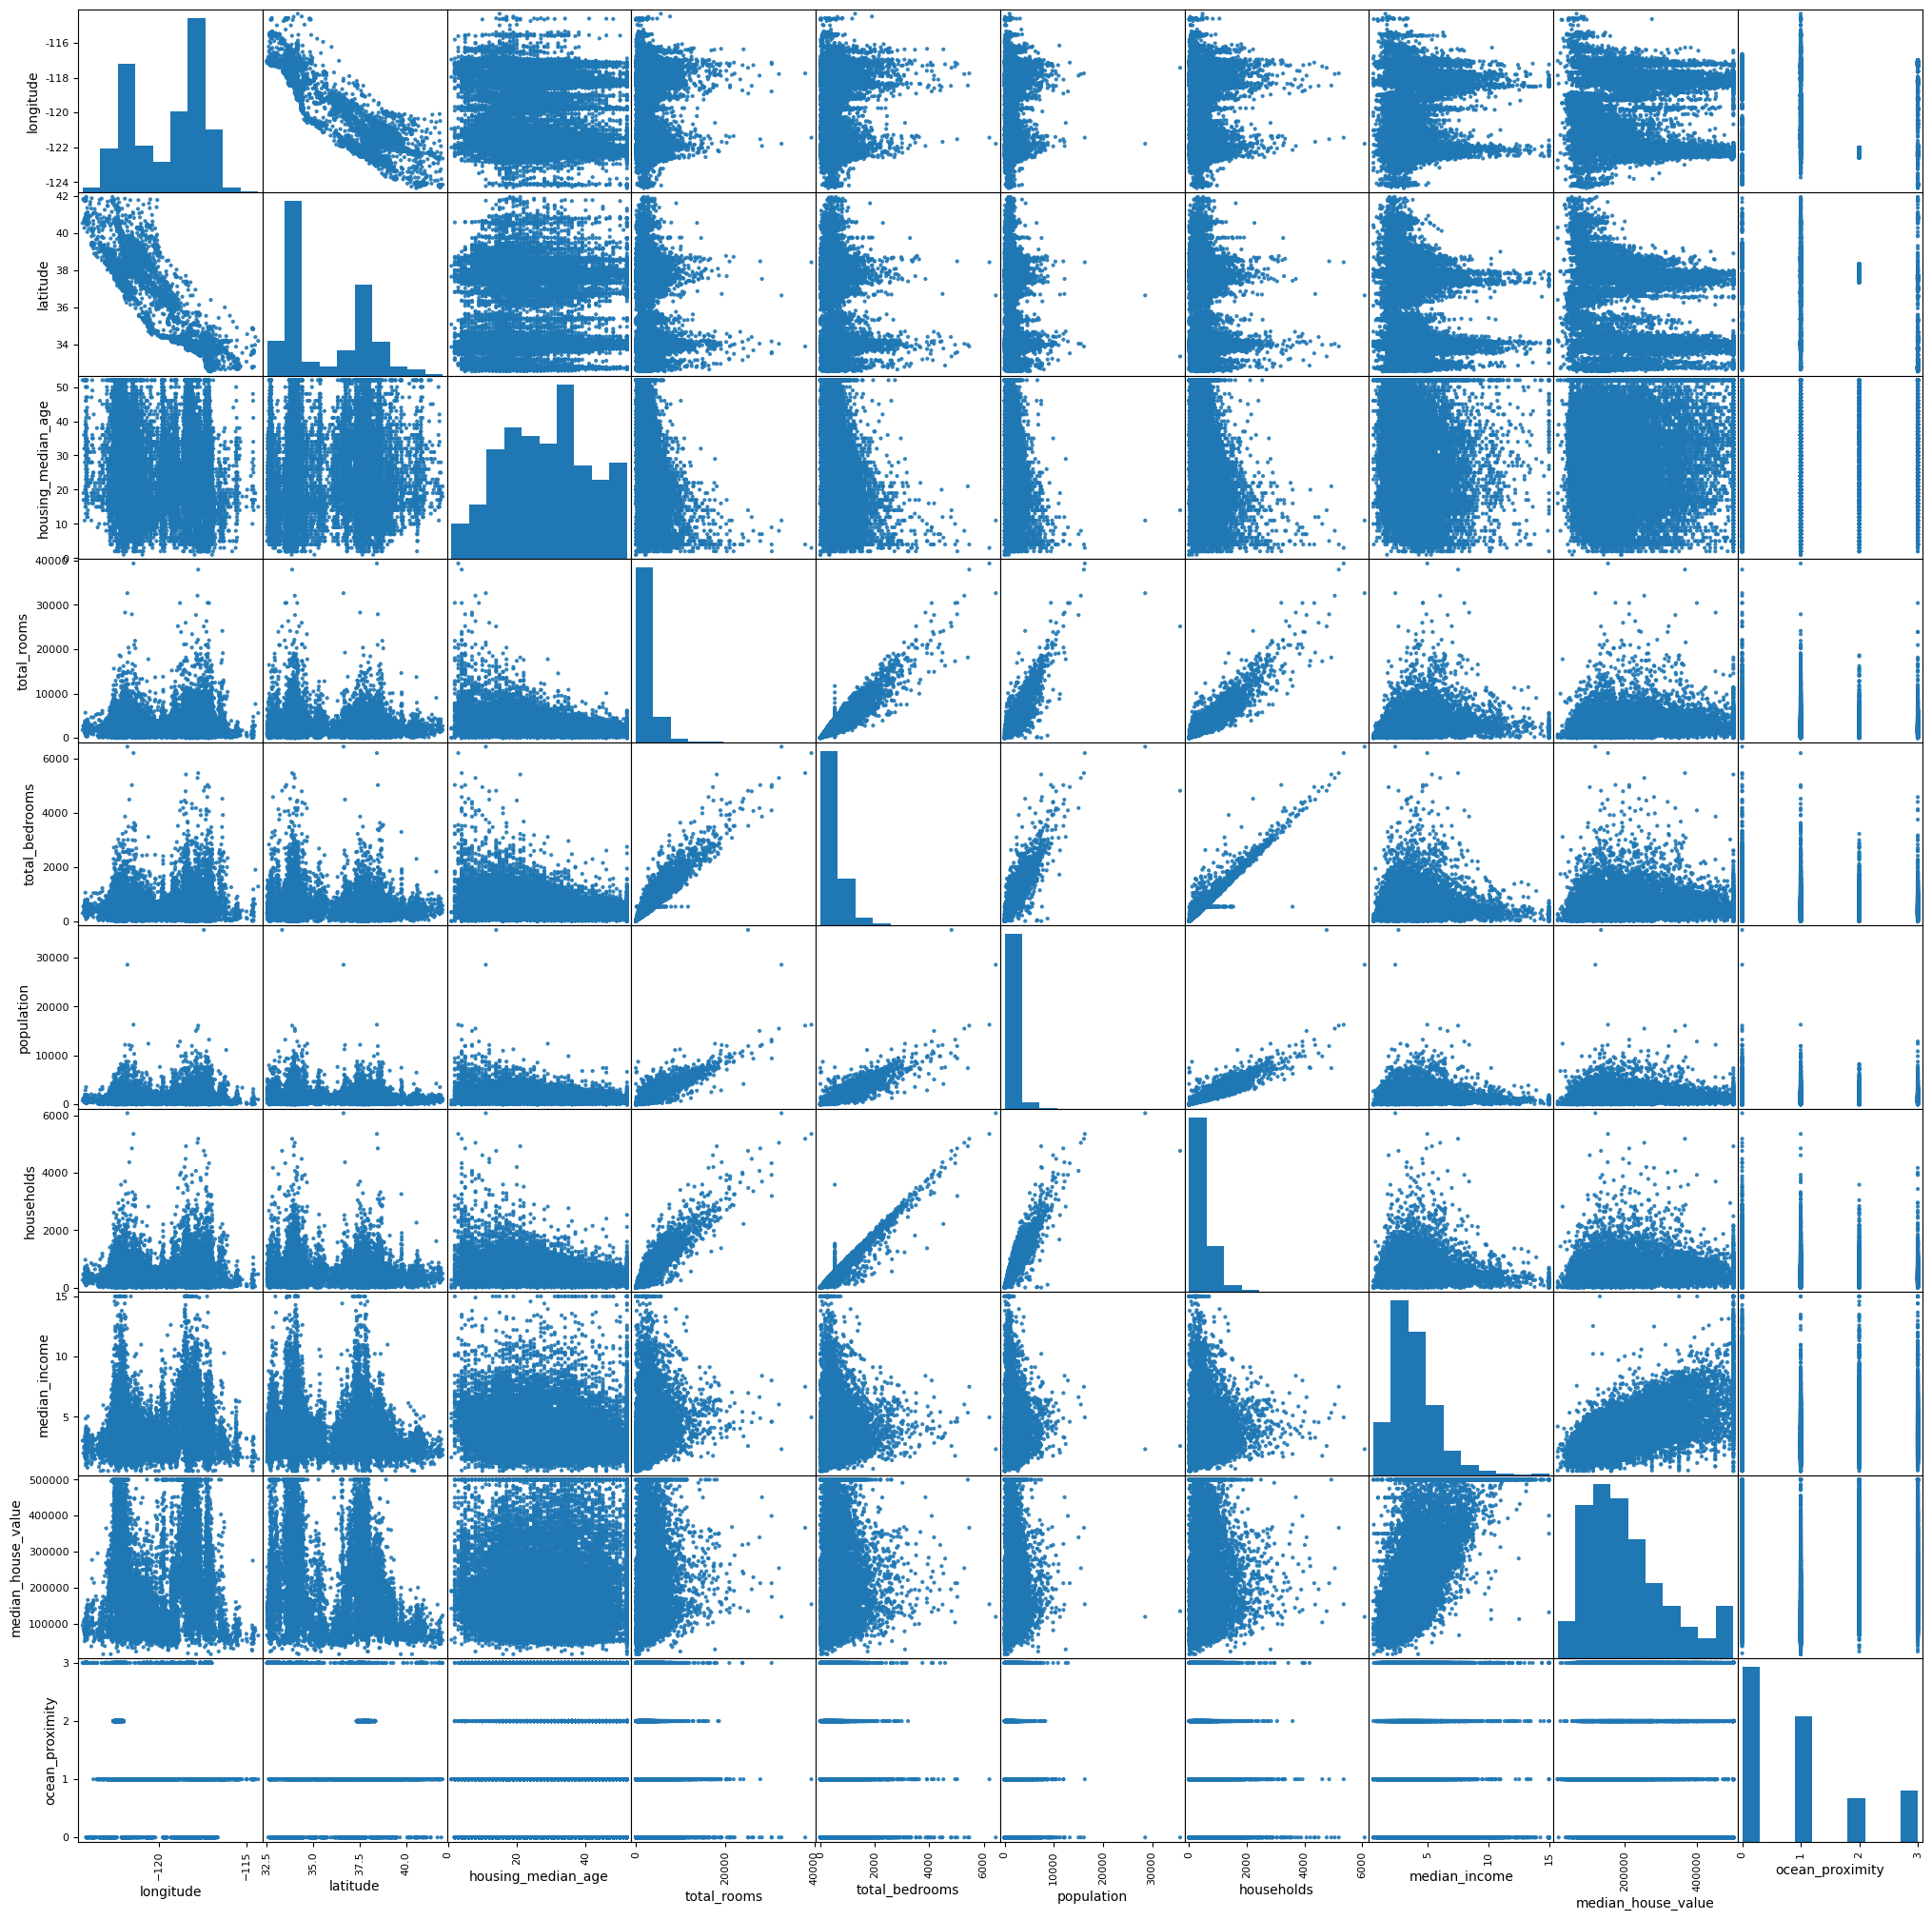

In [18]:
fig = plt.figure()
scatter_matrix(data,figsize =(25,25),alpha=0.9);

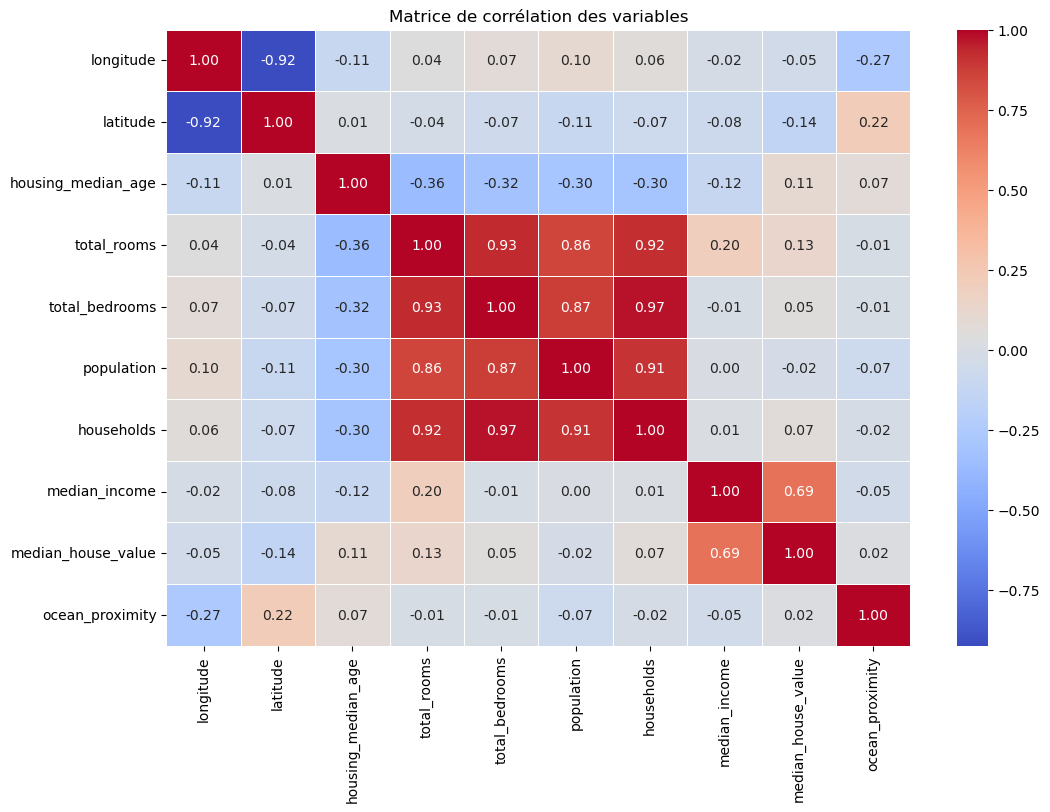

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
plt.title('Matrice de corrélation des variables') 
plt.show()

In [20]:
# Division des données en attributs (X) et variable cible (y)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Division des données en ensembles d'apprentissage et de test (75% pour l'apprentissage et 25% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Apprentissage d'une fonction de régression linéaire
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
# Score de la fonction de régression sur l'échantillon test
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred)


In [21]:
r2

0.6262845923588125

Le score est de :0.6262845923588125 indique que le modèle de regression linéaire explique environ 62% de la variation observée dans la variable cible à l'aide des attributs explicatifs inclus dans le modèle.Et que les 38% restants de la variation peuvent être expliquer par d'autre variable.


In [22]:
y_pred

array([306828.75282497, 232762.23280212, 209221.23919148, ...,
       287600.84491051, 357166.68136959, 322736.33171579])

In [23]:
# Élimination d'un attribut par validation croisée
attributes = X_train.columns
scores_attribute = []
for attribute in attributes:
    X_train_temp = X_train.drop(attribute, axis=1)
    scores = cross_val_score(regression_model, X_train_temp, y_train, cv=5, scoring='r2')
    scores_attribute.append((attribute, np.mean(scores)))

In [24]:
# Trouver l'attribut à éliminer
eli_attribute = min(scores_attribute, key=lambda x: x[1])
eli_attribute[0]


'median_income'

L' attribut à éliminer est median_income

In [25]:
np.mean(scores)

0.6361775680475293

In [26]:
elimine_attribute[1]

0.3777777819945471